### Escuela Politécnica Nacional ###

**Nombre:** Kevin Eduardo Garcia Rodriguez

**Tema:** [Tarea 06] Serie de Taylor y Polinomios de Lagrange

**Repositorio GIT:** https://github.com/Nattyrd/Metodos-Numericos-2025B


<span style="color:red">

CONJUNTO DE EJERCICIOS


### Determine el orden de la mejor aproximación para las siguientes funciones, usando la Serie de Taylor y el Polinomio de Lagrange:

$$ x_n = \frac{1}{25x^2 + 1}  , x_n = 0 $$

$$ arctanx, x_0 = 1 $$

- Escriba las fórmulas de los diferentes polinomios
- Grafique las diferentes aproximaciones



In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f1(x):
    return 1 / (25*x**2 + 1)

def f2(x):
    return sp.atan(x)

### Polinomios de Taylor

In [3]:
def serie_taylor(f, x0, orden):
    """
    Calcula la serie de Taylor de f en x0 hasta el grado 'orden'
    """
    x = sp.Symbol('x')
    taylor = f.series(x, x0, orden + 1).removeO()
    return sp.simplify(taylor)

In [ ]:
def plot_taylor(true_function, taylor_polys, orders, x_range, title):
    x_vals = np.linspace(x_range[0], x_range[1], 400)
    y_true = [true_function(x) for x in x_vals]

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_true, label="Función real", linewidth=2)

    for i, poly in enumerate(taylor_polys):
        func = sp.lambdify(sp.symbols("x"), poly, "numpy")
        plt.plot(x_vals, func(x_vals), linestyle="--", label=f"Taylor orden {orders[i]}")

    plt.title(title + " (Taylor)")
    plt.legend()
    plt.grid(True)

    plt.show()


 FUNCIÓN 1: f(x) = 1/(25x² + 1)

🔹 Polinomios de Taylor F1:
1 - 25*x**2
625*x**4 - 25*x**2 + 1
-15625*x**6 + 625*x**4 - 25*x**2 + 1


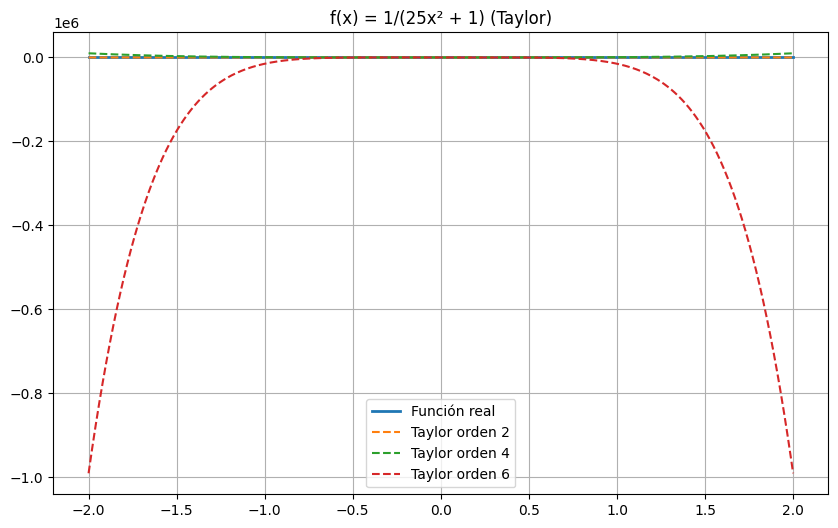

In [8]:
print("\n FUNCIÓN 1: f(x) = 1/(25x² + 1)")
f1_sym = f1(sp.symbols("x"))
orders_f1 = [2, 4, 6]
taylor_f1 = [serie_taylor(f1_sym, 0, n) for n in orders_f1]

print("\n🔹 Polinomios de Taylor F1:")
for p in taylor_f1: print(p)

plot_taylor(f1, taylor_f1, orders_f1, (-2, 2), "f(x) = 1/(25x² + 1)")


🔹 FUNCIÓN 2: arctan(x), con x0 = 1

🔹 Polinomios de Taylor F2:
x
-x**3/3 + x
x**5/5 - x**3/3 + x


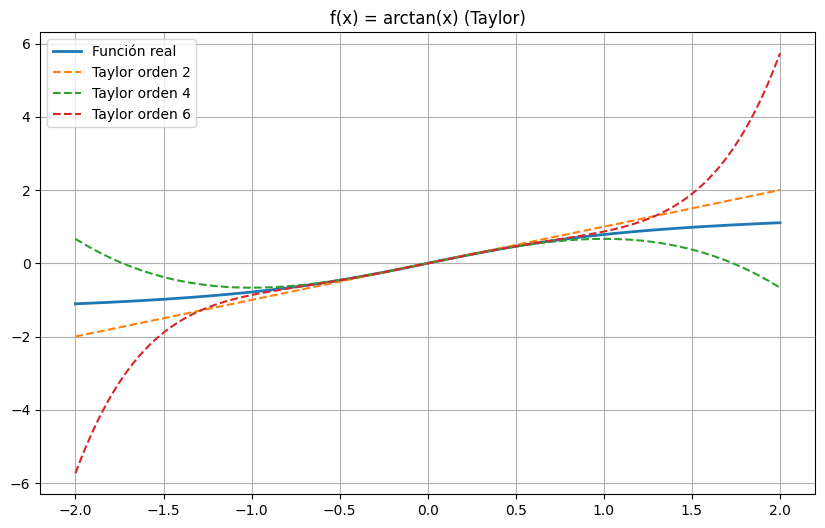

In [9]:
print("\n🔹 FUNCIÓN 2: arctan(x), con x0 = 1")

f2_sym = f2(sp.symbols("x"))
orders_f2 = [2, 4, 6]
taylor_f2 = [serie_taylor(f2_sym, 0, n) for n in orders_f2]

print("\n🔹 Polinomios de Taylor F2:")
for p in taylor_f2: print(p)

plot_taylor(f2, taylor_f2, orders_f2, (-2, 2), "f(x) = arctan(x)")

### Polinomios de Lagrange

In [4]:
def polinomio_lagrange(puntos):
    """
    Calcula el polinomio de Lagrange dado un conjunto de puntos [(x0,y0), (x1,y1), ...]
    """
    x = sp.Symbol('x')
    n = len(puntos)
    polinomio = 0
    for i in range(n):
        xi, yi = puntos[i]
        yi = sp.N(yi).as_real_imag()[0] ##AQUI ESTA EL CAMBIO
        Li = 1
        for j in range(n):
            if i != j:
                xj, _ = puntos[j]
                Li *= (x - xj) / (xi - xj)
        polinomio += yi * Li
    return sp.expand(polinomio)

In [13]:
def plot_lagrange(true_function, lagrange_polys, lagrange_points, x_range, title):
    x_vals = np.linspace(x_range[0], x_range[1], 400)
    y_true = [true_function(x) for x in x_vals]

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_true, label="Función real", linewidth=2)

    for i, poly in enumerate(lagrange_polys):
        func = sp.lambdify(sp.symbols("x"), poly, "numpy")
        plt.plot(x_vals, func(x_vals), linestyle=":", label=f"Lagrange {len(lagrange_points[i])} puntos")
        
    xs = [p[0] for p in lagrange_points[i]]
    ys = [p[1] for p in lagrange_points[i]]
    plt.scatter(xs, ys, s=80, marker="o")
    plt.title(title + " (Lagrange)")
    plt.legend()
    plt.grid(True)
    plt.show()


🔹 Polinomios de Lagrange F2:
1.0 - 0.961538461538462*x
0.466488956587967*x**2 - 1.42802741812643*x + 1.0


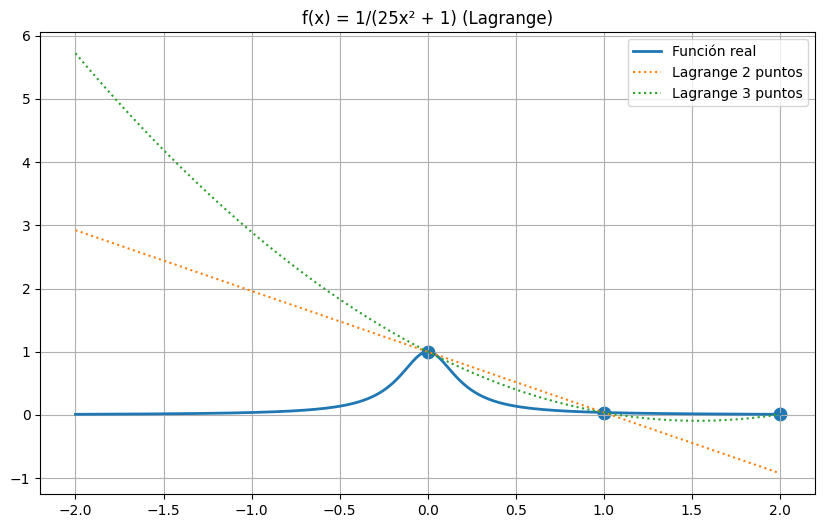

In [15]:
lagrange_sets_f1 = [
        [(0, f1(0)), (1, f1(1))],
        [(0, f1(0)), (1, f1(1)), (2, f1(2))]
    ]
lagrange_f1 = [polinomio_lagrange(points) for points in lagrange_sets_f1]

print("\n🔹 Polinomios de Lagrange F2:")
for p in lagrange_f1: print(p)


plot_lagrange(f1, lagrange_f1, lagrange_sets_f1, (-2, 2), "f(x) = 1/(25x² + 1)")


🔹 Polinomios de Lagrange F2:
0.321750554396642*x + 0.463647609000806
-0.0899267498962391*x**2 + 0.591530804085359*x + 0.283794109208328


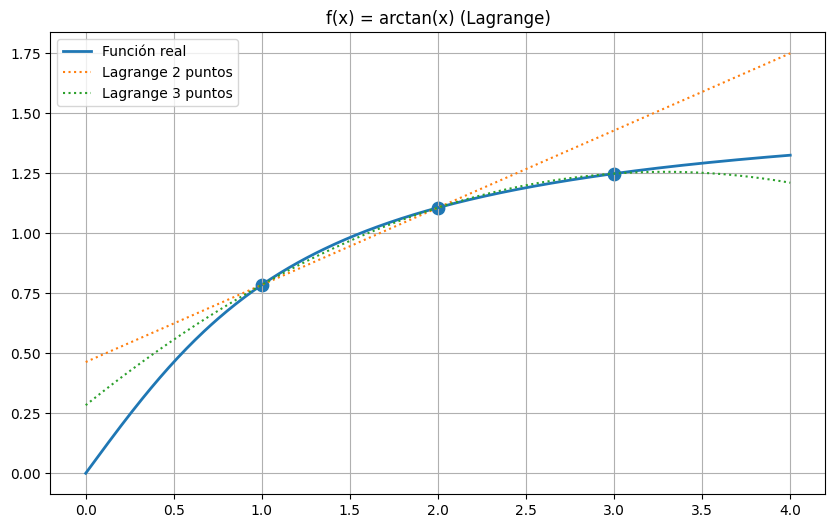

In [14]:
lagrange_sets_f2 = [
        [(1, float(sp.atan(1))), (2, float(sp.atan(2)))],
        [(1, float(sp.atan(1))), (2, float(sp.atan(2))), (3, float(sp.atan(3)))]
    ]
lagrange_f2 = [polinomio_lagrange(points) for points in lagrange_sets_f2]

print("\n🔹 Polinomios de Lagrange F2:")
for p in lagrange_f2: print(p)


plot_lagrange(f2, lagrange_f2, lagrange_sets_f2, (0, 4), "f(x) = arctan(x)")
